<a href="https://colab.research.google.com/github/Bendeguzfrks04/DeepML/blob/main/Readshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, cluster
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import neighbors, ensemble, linear_model
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import xgboost as xgb
from collections import Counter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def RMSE(sol, true):
    return sqrt( ((sol - true)**2).mean() )

In [26]:
df = pd.read_csv("train.csv")

In [51]:
df.describe()

,dered_u,dered_g,dered_r,dered_i,dered_z,ra,dec,redshift
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,19.287027,17.682524,16.927531,16.530984,16.207341,184.730686,24.308683,0.107049
std,34.718664,28.343544,0.750837,0.748181,20.045118,60.201872,18.673170,0.051697
min,-9999.000000,-9999.000000,11.050980,10.665400,-9999.000000,0.006459,-11.244081,0.000024
25%,18.837310,17.369700,16.598147,16.203610,15.904070,150.977836,9.280788,0.069596
50%,19.476425,17.942600,17.146305,16.742110,16.442920,185.849339,22.591795,0.101094
75%,20.094800,18.335392,17.474260,17.064700,16.775990,221.650615,38.153715,0.138921
max,30.066060,25.775880,18.670300,24.333480,26.726530,359.994924,70.268882,0.693718


In [27]:
df.replace(-9999.000000, 18.545691, inplace=True)

In [8]:
data = df.pop('redshift')
X_train, X_test, Y_train, Y_test = train_test_split(df.values, data.values, test_size=0.20, random_state=42)

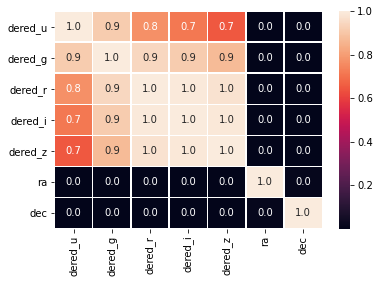

In [9]:
sns.heatmap(df.corr(), annot=True , linewidths=.5, fmt= '.1f')

In [9]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
#Models
kmeans = cluster.KMeans(n_clusters=2, random_state=42)
rf     = ensemble.RandomForestClassifier(random_state=42)
dt     = DecisionTreeClassifier()
lr     = linear_model.LogisticRegression()

In [12]:
knn = KNeighborsRegressor(10)
knn.fit(X_train, Y_train)
preds = knn.predict(X_test)
RMSE(preds, Y_test)


0.03658829504320445

In [13]:
norma = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_scaled = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
norma.mean(0), norma.std(0)

(array([ 2.54756248e-13,  2.66735333e-13, -1.19953388e-13,  3.40196974e-13,
         1.27325915e-13,  3.84532095e-14, -2.38909115e-15]),
 array([1., 1., 1., 1., 1., 1., 1.]))

In [41]:
knn.fit(norma, Y_train)
preds = knn.predict(X_test_scaled)

RMSE(preds, Y_test)

0.027027558530832635

In [42]:
knn.fit(norma[:,0:5], Y_train)  #fit only on the magnitudes
preds = knn.predict(X_test_scaled[:,0:5]) #predict only on the magnitudes

RMSE(preds, Y_test)

0.021555442883598796

In [8]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [17]:
scalar = StandardScaler()

In [18]:
dtest = pd.read_csv("testX.csv")

In [19]:
dtest = pd.read_csv("testX.csv")
dtest.replace(-9999.000000, 18.545691, inplace=True)
dtest.describe()

,dered_u,dered_g,dered_r,dered_i,dered_z,ra,dec,ID
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,19.407799,17.763723,16.928125,16.531663,16.248073,184.881031,24.373270,124999.500000
std,0.988755,0.825710,0.754043,0.752050,0.769482,59.955587,18.686513,72168.927986
min,13.115050,11.879760,11.014940,10.584090,10.336530,0.004289,-11.252825,0.000000
25%,18.839950,17.369050,16.599410,16.204670,15.903587,151.295751,9.307271,62499.750000
50%,19.478290,17.945970,17.149180,16.743670,16.446075,185.958103,22.694393,124999.500000
75%,20.098837,18.339890,17.477320,17.067160,16.777130,221.791583,38.244590,187499.250000
max,29.409720,25.213750,18.430950,29.534010,27.901230,359.997379,70.172744,249999.000000


In [20]:
test_sc = pd.DataFrame(scalar.fit_transform(dtest), columns=dtest.columns)

In [21]:
test_sc = test_sc.iloc[:,0:5]

In [22]:
prd =  knn.predict(test_sc)
subprd = pd.DataFrame(prd, columns=['Redshift']).to_csv('ToSubmit.csv', index_label = 'Id')

In [23]:
'''''
X_train_scaled_extrafeatures = numpy.zeros((199997, 4))

for i in range(199997):
  X_train_scaled_extrafeatures[i][0] = (norma[:,1:2] - norma[:,0:1])[i]
  X_train_scaled_extrafeatures[i][1] = (norma[:,2:3] - norma[:,1:2])[i]
  X_train_scaled_extrafeatures[i][2] = (norma[:,3:4] - norma[:,2:3])[i]
  X_train_scaled_extrafeatures[i][3] = (norma[:,4:5] - norma[:,3:4])[i]
#X_train_scaled_extrafeatures = [new1, new2, new3, new4]
'''''

"''\nX_train_scaled_extrafeatures = numpy.zeros((199997, 4))\n\nfor i in range(199997):\n  X_train_scaled_extrafeatures[i][0] = (norma[:,1:2] - norma[:,0:1])[i]\n  X_train_scaled_extrafeatures[i][1] = (norma[:,2:3] - norma[:,1:2])[i]\n  X_train_scaled_extrafeatures[i][2] = (norma[:,3:4] - norma[:,2:3])[i]\n  X_train_scaled_extrafeatures[i][3] = (norma[:,4:5] - norma[:,3:4])[i]\n#X_train_scaled_extrafeatures = [new1, new2, new3, new4]\n"

In [25]:
test_sc2 = test_sc.iloc[:,0:5]
test_sc2.head()

,dered_u,dered_g,dered_r,dered_i,dered_z
0,-0.837782,-1.266056,-1.388577,-1.381272,-1.383886
1,-0.342835,-0.096612,0.361154,0.520494,0.683237
2,-0.693479,-0.130377,0.521450,0.802059,0.973927
3,0.081255,0.608710,0.942064,1.007099,1.065027
4,0.724631,0.557638,0.408897,0.363005,0.277509


In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
# Creating features (substraction):
test_sc2 = test_sc2.assign(u_g=test_sc2.dered_u-test_sc2.dered_g)
test_sc2 = test_sc2.assign(g_r=test_sc2.dered_g-test_sc2.dered_r)
test_sc2 = test_sc2.assign(r_i=test_sc2.dered_r-test_sc2.dered_i)
test_sc2 = test_sc2.assign(i_z=test_sc2.dered_i-test_sc2.dered_z)

# Creating variables with polynomial expansion:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 
#For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
#p = PolynomialFeatures(degree=2, include_bias=False).fit(test_sc2)
features = pd.DataFrame(scalar.fit_transform(test_sc2), columns=test_sc2.columns)

features.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,u_g,g_r,r_i,i_z
0,-0.837782,-1.266056,-1.388577,-1.381272,-1.383886,1.058906,0.385287,-0.057392,0.017842
1,-0.342835,-0.096612,0.361154,0.520494,0.683237,-0.608786,-1.439514,-1.251742,-1.110640
2,-0.693479,-0.130377,0.521450,0.802059,0.973927,-1.392269,-2.049768,-2.204397,-1.172916
3,0.081255,0.608710,0.942064,1.007099,1.065027,-1.304131,-1.048282,-0.510901,-0.395334
4,0.724631,0.557638,0.408897,0.363005,0.277509,0.412889,0.467741,0.360519,0.583470


In [ ]:
test_anyad = test_sc2.iloc[:,5:9]
prd2 =  knn.predict(test_anyad)
#RMSE(knn.predict(test_sc2), Y_test)

In [35]:
subprd2 = pd.DataFrame(prd2, columns=['Redshift']).to_csv('ToSubmit2.csv', index_label = 'Id')

In [56]:
data = pd.DataFrame(split)

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [ ]:

#below 3 point baseline
knn.fit(data, Y_train)
preds = knn.predict(X_test_scaled_extrafeatures)

RMSE(preds, Y_test)


In [31]:
shape(features)

(250000, 54)

In [80]:
type(norma)

numpy.ndarray

In [ ]:
extre = ensemble.ExtraTreesRegressor()
extre.fit(norma[:,0:5], Y_train)

preds = extre.predict(X_test_scaled)

RMSE(preds, Y_test)

In [87]:
############################################################################################

In [5]:
# Creating features (substraction):
df = df.assign(u_g=df.dered_u-df.dered_g)
df = df.assign(g_r=df.dered_g-df.dered_r)
df = df.assign(r_i=df.dered_r-df.dered_i)
df = df.assign(i_z=df.dered_i-df.dered_z)
#features = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)

df.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,redshift,u_g,g_r,r_i,i_z
0,19.18902,17.12673,16.17146,15.72892,15.38018,0.073469,2.06229,0.95527,0.44254,0.34874
1,19.71668,17.91488,17.06592,16.67560,16.41773,0.067499,1.80180,0.84896,0.39032,0.25787
2,19.73791,18.18637,17.31132,16.86139,16.57027,0.121360,1.55154,0.87505,0.44993,0.29112
3,19.29196,17.68699,16.91789,16.54745,16.24734,0.083287,1.60497,0.76910,0.37044,0.30011
4,19.99879,18.26889,17.44174,17.05618,16.75268,0.098327,1.72990,0.82715,0.38556,0.30350


In [28]:
kula = df.pop('dec')
kuka = df.pop('ra')

In [29]:
data = df.pop('redshift')
X_train, X_test, Y_train, Y_test = train_test_split(df.values, data.values, test_size=0.20, random_state=42)

In [10]:
knn = KNeighborsRegressor(20)
knn.fit(X_train, Y_train)
preds = knn.predict(X_test)
RMSE(preds, Y_test)

0.020840883337263777

In [31]:
norma = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_scaled = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
norma.mean(0), norma.std(0)

(array([ 2.54756248e-13,  2.66735333e-13, -1.19953388e-13,  3.40196974e-13,
         1.27325915e-13]), array([1., 1., 1., 1., 1.]))

In [104]:
knn = KNeighborsRegressor(20)
knn.fit(norma, Y_train)
preds = knn.predict(X_test_scaled)
RMSE(preds, Y_test)

0.020000360162310726

In [117]:
from sklearn import neural_network
neural_network.

In [18]:
xgb = xgb.XGBRegressor()
xgb.fit(X_train, Y_train)
#test_x = X_test_scaled.values
preds = xgb.predict(X_test)

RMSE(preds, Y_test)

[21:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.02086483137830457

In [123]:
neural = neural_network.MLPRegressor(hidden_layer_sizes=(120,), activation='relu',learning_rate_init=0.0001)
neural.fit(norma2, Y2_train)

preds = neural.predict(X2_test_scaled)

RMSE(preds, Y2_test)

0.023944473877162475

In [13]:
ex_tree = ensemble.ExtraTreesRegressor()
ex_tree.fit(norma, Y_train)

preds = ex_tree.predict(X_test_scaled)

RMSE(preds, Y_test)

0.01993465844804087

In [105]:
ex_tree = ensemble.RandomForestRegressor()
ex_tree.fit(norma, Y_train)

preds = ex_tree.predict(X_test_scaled)

RMSE(preds, Y_test)

0.0197430009562953

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(norma, Y_train)
preds = model.predict(X_test_scaled)
RMSE(preds, Y_test)

0.026729012391681357

In [106]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [ ]:
test_sc = pd.DataFrame(scalar.fit_transform(dtest), columns=dtest.columns)
prd =  knn.predict(test_sc)
subprd = pd.DataFrame(prd, columns=['Redshift']).to_csv('ToSubmit.csv', index_label = 'Id')

In [107]:
dtest = pd.read_csv("testX.csv")
dtest.replace(-9999.000000, 18.545691, inplace=True)
dtest.describe()

,dered_u,dered_g,dered_r,dered_i,dered_z,ra,dec,ID
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,19.407799,17.763723,16.928125,16.531663,16.248073,184.881031,24.373270,124999.500000
std,0.988755,0.825710,0.754043,0.752050,0.769482,59.955587,18.686513,72168.927986
min,13.115050,11.879760,11.014940,10.584090,10.336530,0.004289,-11.252825,0.000000
25%,18.839950,17.369050,16.599410,16.204670,15.903587,151.295751,9.307271,62499.750000
50%,19.478290,17.945970,17.149180,16.743670,16.446075,185.958103,22.694393,124999.500000
75%,20.098837,18.339890,17.477320,17.067160,16.777130,221.791583,38.244590,187499.250000
max,29.409720,25.213750,18.430950,29.534010,27.901230,359.997379,70.172744,249999.000000


In [108]:
kula_test = dtest.pop('dec')
kuka_test = dtest.pop('ra')


In [109]:
id_test = dtest.pop('ID')

In [110]:
# Creating features (substraction):
dtest = dtest.assign(u_g=dtest.dered_u-dtest.dered_g)
dtest = dtest.assign(g_r=dtest.dered_g-dtest.dered_r)
dtest = dtest.assign(r_i=dtest.dered_r-dtest.dered_i)
dtest = dtest.assign(i_z=dtest.dered_i-dtest.dered_z)
#features = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)

dtest.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,u_g,g_r,r_i,i_z
0,18.57944,16.71833,15.88108,15.49288,15.18320,1.86111,0.83725,0.38820,0.30968
1,19.06882,17.68395,17.20045,16.92310,16.77381,1.38487,0.48350,0.27735,0.14929
2,18.72212,17.65607,17.32132,17.13485,16.99749,1.06605,0.33475,0.18647,0.13736
3,19.48814,18.26634,17.63848,17.28905,17.06759,1.22180,0.62786,0.34943,0.22146
4,20.12428,18.22417,17.23645,16.80466,16.46161,1.90011,0.98772,0.43179,0.34305


In [81]:
test_sc = pd.DataFrame(scalar.fit_transform(dtest), columns=dtest.columns)
prd3 =  knn.predict(test_sc)
subprd3 = pd.DataFrame(prd3, columns=['Redshift']).to_csv('ToSubmit3.csv', index_label = 'Id')

In [ ]:
prd5 =  knn.predict(normalized)
subprd5 = pd.DataFrame(prd5, columns=['Redshift']).to_csv('ToSubmit5.csv', index_label = 'Id')

In [115]:
test_sc = pd.DataFrame(scalar.fit_transform(normalized), columns=normalized.columns)
prd_tree =  ex_tree.predict(test_sc)
subprd_tree = pd.DataFrame(prd_tree, columns=['Redshift']).to_csv('ToSubmit_forest2.csv', index_label = 'Id')

In [114]:
normalized = (dtest - dtest.mean(axis=0)) / dtest.std(axis=0)
#X_test_scaled = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
normalized.mean(0), normalized.std(0)

(dered_u   -1.241279e-17
 dered_g   -2.233569e-17
 dered_r   -7.114265e-17
 dered_i    7.132561e-17
 dered_z    1.378542e-17
 u_g        2.267964e-17
 g_r       -9.670487e-18
 r_i        1.390732e-17
 i_z       -1.212364e-19
 dtype: float64, dered_u    1.0
 dered_g    1.0
 dered_r    1.0
 dered_i    1.0
 dered_z    1.0
 u_g        1.0
 g_r        1.0
 r_i        1.0
 i_z        1.0
 dtype: float64)

In [89]:
###################################################################################################

In [22]:
dfu = df.pop('dered_u')
dfg = df.pop('dered_g')
dfr = df.pop('dered_r')
dfi = df.pop('dered_i')
dfz = df.pop('dered_z')

In [23]:
#data = df.pop('redshift')
X2_train, X2_test, Y2_train, Y2_test = train_test_split(df.values, data.values, test_size=0.20, random_state=42)

In [24]:
norma2 = (X2_train - X2_train.mean(axis=0)) / X2_train.std(axis=0)
X2_test_scaled = (X2_test - X2_train.mean(axis=0)) / X2_train.std(axis=0)
norma2.mean(0), norma2.std(0)

(array([-9.49316514e-15, -2.49466736e-16, -1.55354474e-14, -1.46521234e-16]),
 array([1., 1., 1., 1.]))

In [95]:
knn = KNeighborsRegressor(20)
knn.fit(norma2, Y2_train)
preds2 = knn.predict(X2_test_scaled)
RMSE(preds2, Y2_test)

0.021583856732940974

In [97]:
ex_tree = ensemble.RandomForestRegressor()
ex_tree.fit(norma2, Y2_train)

preds2 = ex_tree.predict(X2_test_scaled)

RMSE(preds2, Y2_test)

0.02184881562933691